In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import data_cleaning
import review_score_analysis
import price_range_analysis
import reviewer_data
import text_analysis
%matplotlib inline

# Progress Report: 

# Our project investigates Yelp restaurant data to find out what factors impact peoples review scores. We are mostly curious about how location, price range and reviews relate to user ratings. Our dataset comes from a Yelp Open Dataset. We have filtered it to mainly focus on restaurant businesses and their reviews. We are trying to uncover trends and test hypotheses such as: "Do expensive places get better reviews"

# Changes:

# Almost everything has mostly gone according to plan. This is except for in regards to clustering. At first we had planned to group restaurants based on quality. Ultimately we decided clustering wasn't the right approach due to insufficient variables within the dataset. During our EDA we discovered a strong bias in the Yelp review data. The bias was that most reviews are either 1-star or 5-star, with not much in between. This interesting pattern affects how we analyze and model the data going forward. 

In [2]:
# Data Cleaning:


# Adjust as needed, these dataframes are big. No, really

chunk_size = 20_000


# Using these functions, we select businesses marked with the category "restaurant" (case insensitive) and select
# the restaurants with 30 or more reviews, leaving out any restaurants with fewer than that.
restaurants_df = data_cleaning.filter_business_data("data/yelp_academic_dataset_business.json", chunk_size)

# The reviews were cleaned to remove any reviews that weren't for restaurants in our above dataframe.
reviews_df = data_cleaning.filter_review_data("data/yelp_academic_dataset_review.json", restaurants_df, chunk_size)
# Similarly, users who did not write a review for a restaurant were removed.
users_df = data_cleaning.filter_user_data("data/yelp_academic_dataset_user.json" , reviews_df, chunk_size)

Total businesses: 27894
Total reviews for these restaurants: 4371282


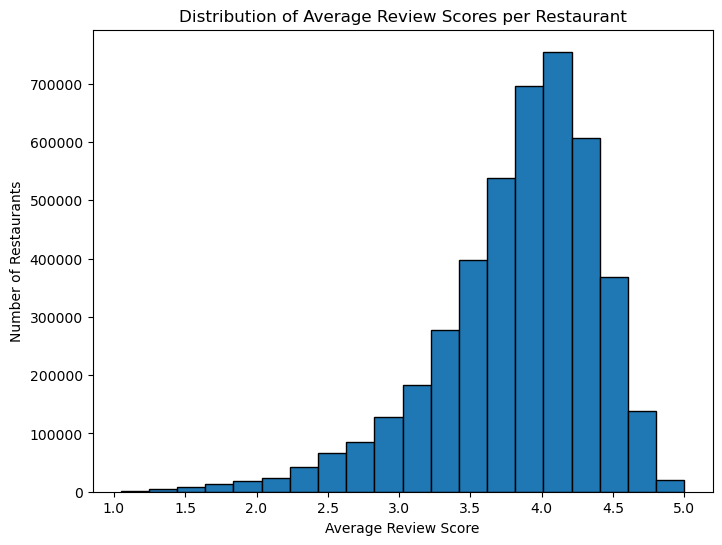

In [10]:
# EDA
import review_score_analysis
print(f"Total businesses: {len(restaurants_df)}")
print(f"Total reviews for these restaurants: {len(reviews_df)}")




# calculate average review scores
avg_score_df = review_score_analysis.calculate_average_review_score(reviews_df)

# avg_score_df.head()
restaurants_df.head()

# TODO: Plot distribution of avg and average score - Harket

#avg_scores_unique = avg_score_df[['business_id', 'avg_review_score']].drop_duplicates()

review_score_analysis.plot_average_score_distribution(avg_score_df)

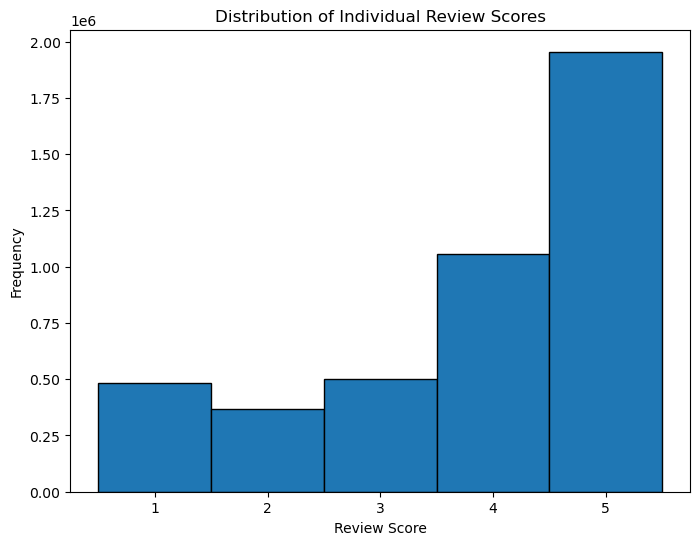

In [11]:
# Visualization

# TODO: Count of individual review scores - Harket
review_score_analysis.plot_review_distribution(reviews_df)

In [12]:
# EDA
print(f"Total businesses: {len(restaurants_df)}")
print(f"Total reviews for these restaurants: {len(reviews_df)}")




# calculate average review scores
avg_score_df = review_score_analysis.calculate_average_review_score(reviews_df)

# avg_score_df.head()
# restaurants_df.head()
# TODO: Plot distribution of avg and average score - Harket

Total businesses: 27894
Total reviews for these restaurants: 4371282


,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours
3,MTSW4McQd7CbVtyjqoe9mw,St Honore Pastries,935 Race St,Philadelphia,PA,19107,39.955505,-75.155564,4.0,80,1,"{'RestaurantsDelivery': 'False', 'OutdoorSeati...","Restaurants, Food, Bubble Tea, Coffee & Tea, B...","{'Monday': '7:0-20:0', 'Tuesday': '7:0-20:0', ..."
14,0bPLkL0QhhPO5kt1_EXmNQ,Zio's Italian Market,2575 E Bay Dr,Largo,FL,33771,27.916116,-82.760461,4.5,100,0,"{'OutdoorSeating': 'False', 'RestaurantsGoodFo...","Food, Delis, Italian, Bakeries, Restaurants","{'Monday': '10:0-18:0', 'Tuesday': '10:0-20:0'..."
15,MUTTqe8uqyMdBl186RmNeA,Tuna Bar,205 Race St,Philadelphia,PA,19106,39.953949,-75.143226,4.0,245,1,"{'RestaurantsReservations': 'True', 'Restauran...","Sushi Bars, Restaurants, Japanese","{'Tuesday': '13:30-22:0', 'Wednesday': '13:30-..."
19,ROeacJQwBeh05Rqg7F6TCg,BAP,1224 South St,Philadelphia,PA,19147,39.943223,-75.162568,4.5,205,1,"{'NoiseLevel': 'u'quiet'', 'GoodForMeal': '{'d...","Korean, Restaurants","{'Monday': '11:30-20:30', 'Tuesday': '11:30-20..."
20,WKMJwqnfZKsAae75RMP6jA,Roast Coffeehouse and Wine Bar,10359 104 Street NW,Edmonton,AB,T5J 1B9,53.546045,-113.499169,4.0,40,0,"{'OutdoorSeating': 'False', 'Caters': 'True', ...","Coffee & Tea, Food, Cafes, Bars, Wine Bars, Re...","{'Monday': '8:0-18:0', 'Tuesday': '8:0-18:0', ..."


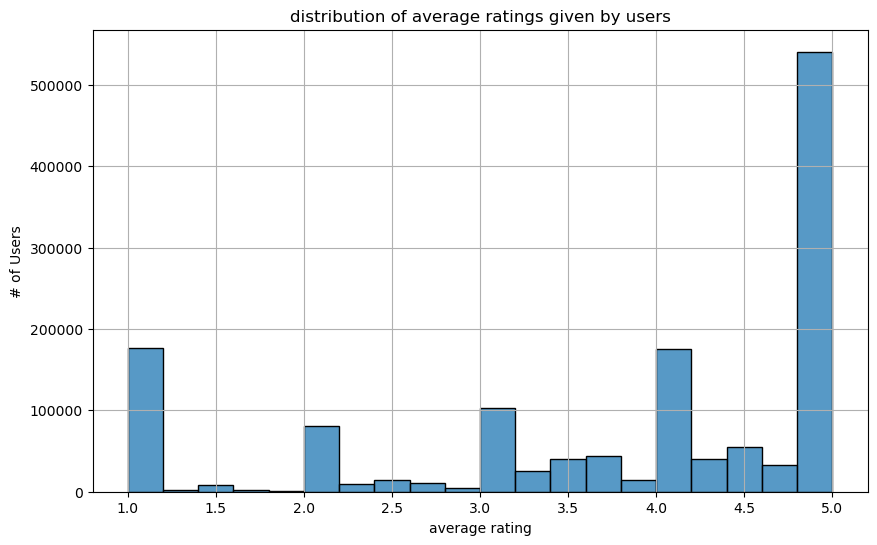

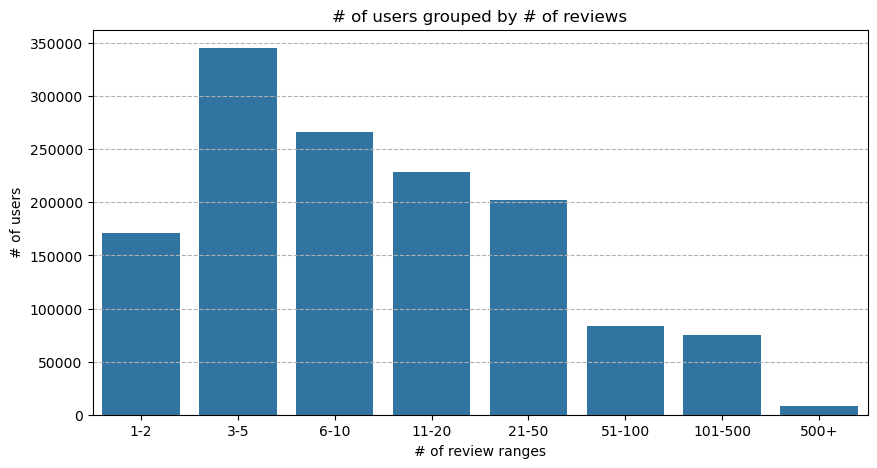

In [13]:
# Visualization

reviewer_data.averageRatingbyUsers(users_df, reviews_df)
reviewer_data.numReviewDistributionbyUsers(users_df)



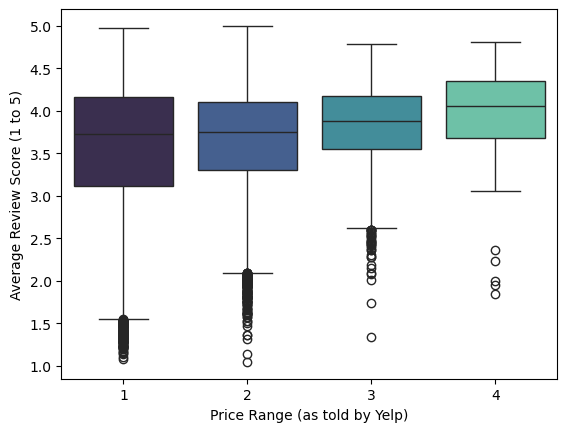

In [3]:
# TODO: Does Price Range impact average review score? - Sonya
averageStarsRestaurants=price_range_analysis.addAverageStarsColumn(restaurants_df, reviews_df)



tempDF, priceRangeList=price_range_analysis.addPriceRangeColumn(averageStarsRestaurants)
# for inexplicable reasons, the function must be broken up here because the code of assigning a new column fails in the .py file if attempted
# hence why there is a step1 and a step2 method.
tempDF["PriceRange"]=priceRangeList
price_range_analysis.showPriceRangePlot(tempDF)



In [ ]:
# ML Task

# TODO: SVM of text from reviews - Cody

# Reflection

**What is the hardest part of the project that you’ve encountered so far?**  
The hardest part has been dealing with the size of the Yelp dataset and figuring out how to work with and clean it efficiently. Text processing has also been tricky since it’s new to most of us. Corrdiating what tasks each memember will do can be tricky at times aswell as figuring out meeting time. Also some people are newer to github so getting everyone to use branches properly took some time.

**What are your initial insights?**  
We noticed most restaurants have an avergae score that pretty high around 4 stars. We also noticed that Yelp review scores are heavily skewed most people either give 1 star or 5 stars. Thats a important pattern to keep in mind when analyzing or modeling the data. 

**Are there any concrete results you can show at this point? If not, why not?**  
We have really solid evidence for the bias in the data. We also have a working ML model.

**Going forward, what are the current biggest problems you’re facing?**  
We need to finalize more meaningful visualizations and build a simple but useful ML model. We are also figuring out how to balance our meeting times and workload between team members.

**Do you think you are on track with your project? If not, what parts do you need to dedicate more time to?**  
We are mostly on track but we need to spend more time on the ML side and make sure our visualizations are strong enough for our final project.

**Given your initial exploration of the data, is it worth proceeding with your project, why? If not, how are you going to change your project and why do you think it’s better than your current results?**  
Yes, we still think it’s worth continuing. The data has some challenges but it’s rich and interesting. Once we add more cleaning and focused analysis, we believe we can hopefully uncover useful patterns and build something solid.
